<a href="https://colab.research.google.com/github/lopes-adriano/machine-learning/blob/main/fuzzy_cmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de ML - Aprendizado não supervisionado

Aluno: Adriano Ferreira Lopes

Matrícula: 201802671

## Fuzzy C-Means

### Introdução

O algoritmo Fuzzy C-Means (FCM) é um método de clustering que estende o C-Means convencional, permitindo que um ponto de dados pertença a múltiplos clusters com diferentes graus de pertinência (ou pertinências). Em vez de atribuir rigidamente cada ponto a um único cluster, o FCM atribui uma pontuação de pertinência para cada ponto em relação a cada cluster, representando a "fuzzyficação" da pertinência.

### Aplicações

- Segmentação de Imagens: O FCM é frequentemente utilizado para segmentar imagens, onde os pixels podem pertencer a diferentes objetos com graus variados de pertinência.

- Agrupamento de Dados Não-Clássicos: Em situações em que a pertinência de um ponto a um cluster não é clara ou binária, o FCM oferece uma abordagem mais flexível.

### Vantagens

1. Flexibilidade na Pertinência: A capacidade de atribuir graus de pertinência permite uma modelagem mais flexível em comparação com métodos de clustering rígidos.

2. Robustez a Outliers: A presença de pontos atípicos tem menos impacto no FCM, pois os pontos podem pertencer parcialmente a diferentes clusters.

### Desvantagens

1. Sensibilidade à Inicialização: O desempenho do FCM pode depender da inicialização dos centros dos clusters e dos parâmetros, assim como em outros métodos de clustering.

2. Computacionalmente Intensivo: O FCM pode ser computacionalmente mais intensivo em comparação com métodos de clustering mais simples.

### Exemplo de código

In [14]:
!pip install -q scikit-fuzzy

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import skfuzzy as fuzz

In [16]:
# Carregar o conjunto de dados Iris
iris = datasets.load_iris()
X = iris.data.T  # Transpor os dados para que as características sejam ao longo das colunas

In [17]:
# Aplicar Fuzzy C-Means
centers, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    X, c=3, m=2, error=0.005, maxiter=1000, init=None
)

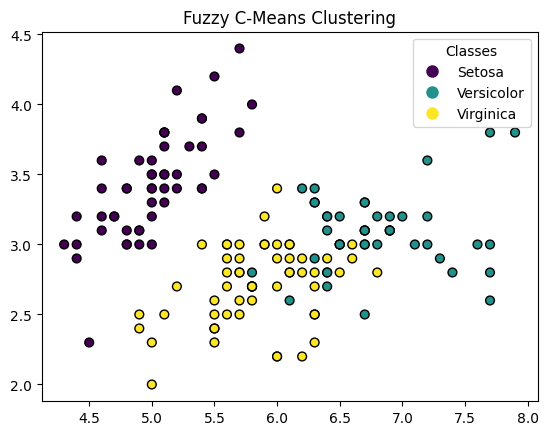

In [22]:
# Obter os rótulos dos clusters
labels = np.argmax(u, axis=0)

# Visualizar os resultados
scatter = plt.scatter(X[0, :], X[1, :], c=labels, cmap='viridis', s=40, edgecolors='k', marker='o')

legend_labels = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10, label=legend_labels[label]) for label in legend_labels]
plt.legend(handles=handles, title='Classes')
plt.title('Fuzzy C-Means Clustering')
plt.show()